# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

optuna.logging.set_verbosity(optuna.logging.WARNING)

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ–±–∑–æ—Ä –¥–∞–Ω–Ω—ã—Ö

In [20]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

test_ids = test["id"]

In [21]:
print("–†–∞–∑–º–µ—Ä train:", train.shape)
print("–†–∞–∑–º–µ—Ä test:", test.shape)
train.sample(10)

–†–∞–∑–º–µ—Ä train: (165034, 14)
–†–∞–∑–º–µ—Ä test: (110023, 13)


id  CustomerId          Surname  CreditScore Geography  Gender  \
159841  159841    15641621         Chibueze          827    France    Male   
93196    93196    15645095            Huang          674    France  Female   
71552    71552    15576714            Manna          687     Spain  Female   
152355  152355    15646726         Onwubiko          705    France    Male   
1201      1201    15658475             Lori          834    France    Male   
115743  115743    15652910  Onyinyechukwuka          751    France  Female   
100473  100473    15645025         Lucchese          707   Germany    Male   
59273    59273    15791501            T'ang          596    France  Female   
126864  126864    15659937     Otutodilinna          703    France  Female   
108987  108987    15791778      Yevdokimova          709     Spain    Male   

         Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
159841  38.0       3  132452.96              1        1.0             1.0   
93196   37.0       3       0.00              2        1.0             0.0   
71552   21.0       8       0.00              2        1.0             0.0   
152355  44.0       6       0.00              2        1.0             0.0   
1201    34.0       8       0.00              2        1.0             0.0   
115743  35.0       0       0.00              1        1.0             1.0   
100473  33.0       2  133853.23              1        1.0             0.0   
59273   34.0       8  131287.36              1        1.0             0.0   
126864  40.0       7       0.00              1        0.0             1.0   
108987  39.0       5  125537.43              1        0.0             0.0   

        EstimatedSalary  Exited  
159841        176713.47       0  
93196          51536.99       0  
71552         154767.34       0  
152355         81622.52       0  
1201           72969.90       0  
115743        123866.77       0  
100473         90106.94       0  
59273         120790.02       0  
126864        122518.50       0  
108987        118528.73       0

In [22]:
print("–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:")
train.info()

–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞–Ω–Ω—ã—Ö:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [23]:
print("\n–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (—á–∏—Å–ª–æ–≤—ã–µ):")
display(train.describe())
print("\n–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ):")
display(train.describe(include='object'))


–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (—á–∏—Å–ª–æ–≤—ã–µ):


id    CustomerId    CreditScore            Age         Tenure  \
count  165034.0000  1.650340e+05  165034.000000  165034.000000  165034.000000   
mean    82516.5000  1.569201e+07     656.454373      38.125888       5.020353   
std     47641.3565  7.139782e+04      80.103340       8.867205       2.806159   
min         0.0000  1.556570e+07     350.000000      18.000000       0.000000   
25%     41258.2500  1.563314e+07     597.000000      32.000000       3.000000   
50%     82516.5000  1.569017e+07     659.000000      37.000000       5.000000   
75%    123774.7500  1.575682e+07     710.000000      42.000000       7.000000   
max    165033.0000  1.581569e+07     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  165034.000000  165034.000000  165034.000000   165034.000000   
mean    55478.086689       1.554455       0.753954        0.497770   
std     62817.663278       0.547154       0.430707        0.499997   
min         0.000000       1.000000       0.000000        0.000000   
25%         0.000000       1.000000       1.000000        0.000000   
50%         0.000000       2.000000       1.000000        0.000000   
75%    119939.517500       2.000000       1.000000        1.000000   
max    250898.090000       4.000000       1.000000        1.000000   

       EstimatedSalary         Exited  
count    165034.000000  165034.000000  
mean     112574.822734       0.211599  
std       50292.865585       0.408443  
min          11.580000       0.000000  
25%       74637.570000       0.000000  
50%      117948.000000       0.000000  
75%      155152.467500       0.000000  
max      199992.480000       1.000000


–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ):


Surname Geography  Gender
count   165034    165034  165034
unique    2797         3       2
top       Hsia    France    Male
freq      2456     94215   93150

In [24]:
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", train.duplicated().sum())
print(f"\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö:\n{train.nunique()}")

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö:
id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64


# EDA (Exploratory Data Analysis)

## –ê–Ω–∞–ª–∏–∑ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Exited`

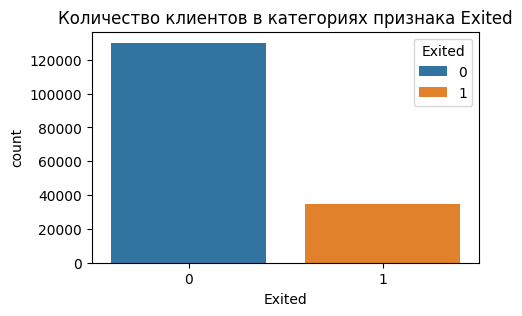

In [25]:
plt.figure(figsize=(5,3))
sns.countplot(data=train,x=train['Exited'],hue=train['Exited'])
plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞ Exited");

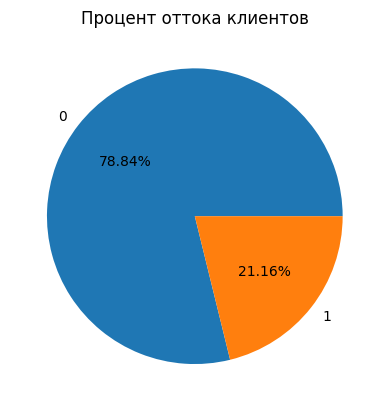

In [26]:
gb = train.groupby('Exited').agg({'Exited': 'count'})
plt.title('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.pie(gb['Exited'],labels=gb.index,autopct='%1.2f%%');

–ü—Ä–∏–∑–Ω–∞–∫ `Exited` –æ—Ç—Ä–∞–∂–∞–µ—Ç —Ñ–∞–∫—Ç –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–∞ –∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–∞–∫ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (–±–∏–Ω–∞—Ä–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è).  

- **–ó–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–∞:**  
  - `0` ‚Äî –∫–ª–∏–µ–Ω—Ç –æ—Å—Ç–∞–ª—Å—è –≤ –±–∞–Ω–∫–µ,  
  - `1` ‚Äî –∫–ª–∏–µ–Ω—Ç —É—à—ë–ª (–æ—Ç—Ç–æ–∫).  

---

### –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ `Exited` —è–≤–ª—è–µ—Ç—Å—è **–Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º**: –¥–æ–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (`0`) –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –¥–æ–ª—é —É—à–µ–¥—à–∏—Ö (`1`).  
- –£—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –æ–∫–æ–ª–æ *20% –≤—ã–±–æ—Ä–∫–∏* (—Ç–æ—á–Ω–∞—è –¥–æ–ª—è –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –¥–∞–Ω–Ω—ã—Ö), —á—Ç–æ —Å–æ–∑–¥–∞—ë—Ç –ø—Ä–æ–±–ª–µ–º—É **–∫–ª–∞—Å—Å–æ–≤–æ–≥–æ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞**.  
- –¢–∞–∫–æ–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –º–æ–∂–µ—Ç –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ —Ç–æ–º—É, —á—Ç–æ –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç "—Å–∫–ª–æ–Ω—è—Ç—å—Å—è" –∫ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—é –∫–ª–∞—Å—Å–∞ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ (–æ—Å—Ç–∞–≤—à–∏—Ö—Å—è), –ø–æ–∫–∞–∑—ã–≤–∞—è –≤—ã—Å–æ–∫—É—é Accuracy, –Ω–æ –Ω–∏–∑–∫–∏–π Recall –¥–ª—è –æ—Ç—Ç–æ–∫–∞.  

---

### –í—ã–≤–æ–¥—ã

- –ü—Ä–∏–∑–Ω–∞–∫ `Exited` –∑–∞–¥–∞—ë—Ç –∑–∞–¥–∞—á—É –∫–∞–∫ **–¥–≤–æ–∏—á–Ω—É—é –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏**.  
- –î–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–µ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ –∫ –¥–∏—Å–±–∞–ª–∞–Ω—Å—É: **ROC-AUC, F1-score, Precision-Recall**.  
- –ü—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è –ø—Ä–∏–º–µ–Ω—è—Ç—å –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫—É –∫–ª–∞—Å—Å–æ–≤ .  
- –î–∏—Å–±–∞–ª–∞–Ω—Å –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —Ç–∞–∫–∂–µ –ø–æ–¥—á—ë—Ä–∫–∏–≤–∞–µ—Ç –±–∏–∑–Ω–µ—Å-–ø—Ä–æ–±–ª–µ–º—É: **–æ—Ç—Ç–æ–∫ –∑–∞—Ç—Ä–∞–≥–∏–≤–∞–µ—Ç –º–µ–Ω—å—à—É—é —á–∞—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤, –Ω–æ –∏–º–µ–µ—Ç –≤—ã—Å–æ–∫—É—é –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –¥–ª—è –±–∞–Ω–∫–∞**, —Ç–∞–∫ –∫–∞–∫ –∫–∞–∂–¥—ã–π —É—à–µ–¥—à–∏–π –∫–ª–∏–µ–Ω—Ç –Ω–µ—Å—ë—Ç –ø—Ä—è–º—ã–µ –ø–æ—Ç–µ—Ä–∏.  

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Age`

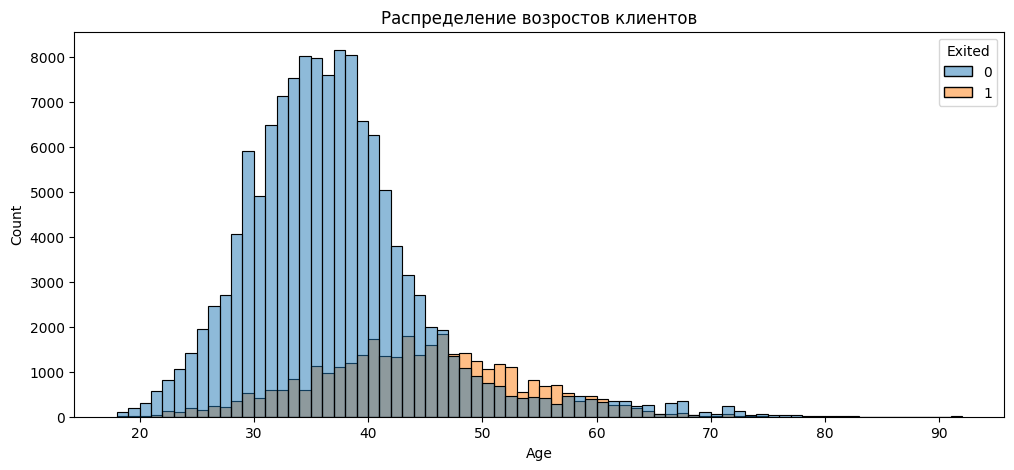

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(data=train,x=train['Age'],bins=74, hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–æ—Å—Ç–æ–≤ –∫–ª–∏–µ–Ω—Ç–æ–≤');

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–æ–∑—Ä–∞—Å—Ç–æ–≤ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É `Exited` (0 ‚Äî –∫–ª–∏–µ–Ω—Ç –æ—Å—Ç–∞–ª—Å—è, 1 ‚Äî —É—à—ë–ª).

- –û—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –≤–æ–∑—Ä–∞—Å—Ç–µ **–æ—Ç 25 –¥–æ 45 –ª–µ—Ç**.  
- –£—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã (`Exited = 1`) –∑–∞–º–µ—Ç–Ω–æ —á–∞—â–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è **–≤ –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø–µ 40‚Äì55 –ª–µ—Ç**.  
- –í –±–æ–ª–µ–µ –º–æ–ª–æ–¥–æ–º –≤–æ–∑—Ä–∞—Å—Ç–µ (–¥–æ 30 –ª–µ—Ç) churn –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç, –∞ –ø–æ—Å–ª–µ 60 –ª–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Ä–µ–∑–∫–æ —Å–Ω–∏–∂–∞–µ—Ç—Å—è, –∏ –≤–ª–∏—è–Ω–∏–µ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–º.  

**–í—ã–≤–æ–¥:** –≤–æ–∑—Ä–∞—Å—Ç —è–≤–ª—è–µ—Ç—Å—è **—Å–∏–ª—å–Ω—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º —Ä–∏—Å–∫–∞ –æ—Ç—Ç–æ–∫–∞**. –û—Å–æ–±–µ–Ω–Ω–æ —Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ (40+), –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç—å –∫ —É—Ö–æ–¥—É.  

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `CreditScore`

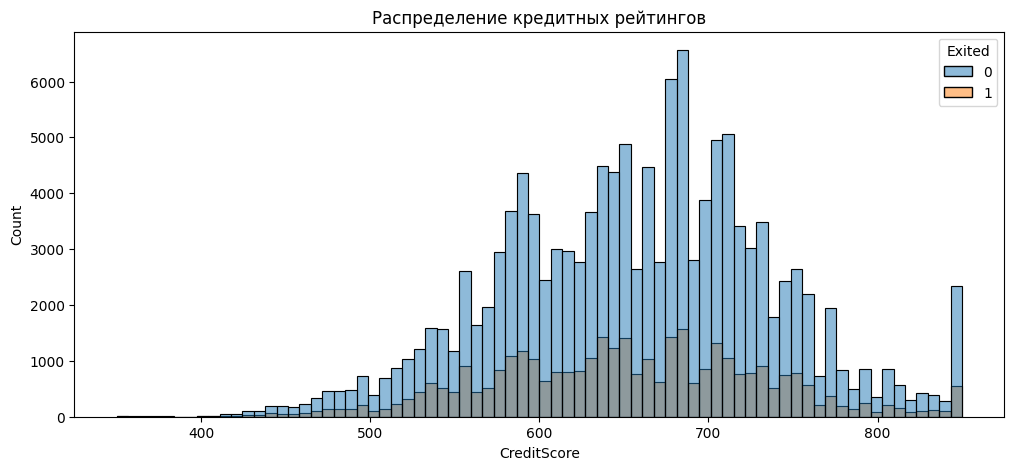

In [28]:
plt.figure(figsize=(12,5))
sns.histplot(data=train,x=train['CreditScore'],bins=74, hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤');

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ `CreditScore` —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É `Exited`.

- –û—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–º–µ–µ—Ç –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ **550‚Äì750**, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ç–∏–ø–∏—á–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é —Å–∫–æ—Ä–∏–Ω–≥–æ–≤ –≤ –±–∞–Ω–∫–æ–≤—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö.  
- –£—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã (`Exited = 1`) –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤–æ –≤—Å–µ—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–∞—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤, –æ–¥–Ω–∞–∫–æ –∏—Ö –¥–æ–ª—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–∞ –∏ –Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —è—Ä–∫–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞.  
- –ö–ª–∏–µ–Ω—Ç—ã —Å –Ω–∏–∑–∫–∏–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º (<500) –∏ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∏–º (>800) –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–¥–∫–æ, –∏ –∑–Ω–∞—á–∏–º—ã—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤ –æ—Ç—Ç–æ–∫–∞ –≤ —ç—Ç–∏—Ö –≥—Ä—É–ø–ø–∞—Ö –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è.  

**–í—ã–≤–æ–¥:** –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ **–Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Å–∏–ª—å–Ω—ã–º –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–º –æ—Ç—Ç–æ–∫–∞**. –ï–≥–æ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Ä–µ—à–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ —É–π—Ç–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤–æ–∑—Ä–∞—Å—Ç –∏–ª–∏ –±–∞–ª–∞–Ω—Å).  

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Geography`

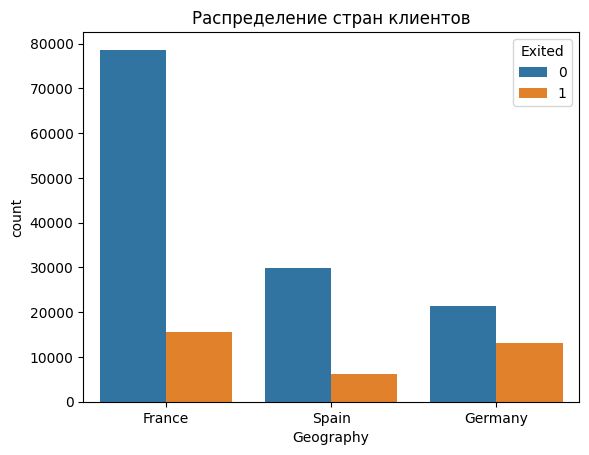

In [29]:
sns.countplot(data=train,x=train['Geography'],hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç—Ä–∞–Ω –∫–ª–∏–µ–Ω—Ç–æ–≤');

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ —Å—Ç—Ä–∞–Ω–∞–º —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ —É—à–µ–¥—à–∏—Ö (Exited=1) –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (Exited=0).

- **France**: –ù–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ (‚âà78k –Ω–µ —É—à–µ–¥—à–∏—Ö, ‚âà15k —É—à–µ–¥—à–∏—Ö). –î–æ–ª—è —É—à–µ–¥—à–∏—Ö –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤–æ –§—Ä–∞–Ω—Ü–∏–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ **16%**.  
- **Spain**: –ú–µ–Ω—å—à–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –Ω–æ –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö —Å—Ö–æ–∂–∞, –æ–∫–æ–ª–æ **17%**.  
- **Germany**: –û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–µ–Ω—å—à–µ, –Ω–æ –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –≤—ã—à–µ, –ø—Ä–∏–º–µ—Ä–Ω–æ **38%**, —á—Ç–æ –∑–∞–º–µ—Ç–Ω–æ –≤—ã–¥–µ–ª—è–µ—Ç –ì–µ—Ä–º–∞–Ω–∏—é –ø–æ —Ä–∏—Å–∫—É –æ—Ç—Ç–æ–∫–∞.

**–í—ã–≤–æ–¥—ã:**
- –ì–µ–æ–≥—Ä–∞—Ñ–∏—è —è–≤–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞: –∫–ª–∏–µ–Ω—Ç—ã –∏–∑ –ì–µ—Ä–º–∞–Ω–∏–∏ —É—Ö–æ–¥—è—Ç —á–∞—â–µ.
- –ü—Ä–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç–µ —Å—Ç–æ–∏—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π —Å—Ç—Ä–∞–Ω—ã, —Ç–∞–∫ –∫–∞–∫ –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö —Å–∏–ª—å–Ω–æ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è.

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Gender`

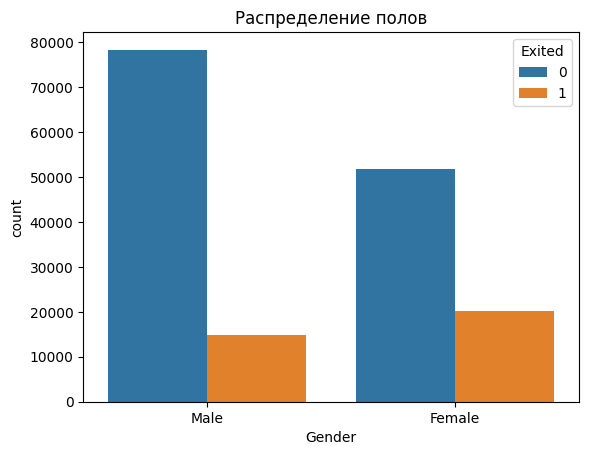

In [30]:
sns.countplot(data=train,x=train['Gender'],hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–ª–æ–≤');

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø–æ–ª—É —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ —É—à–µ–¥—à–∏—Ö (Exited=1) –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (Exited=0).

- **–ú—É–∂—á–∏–Ω—ã (Male)**: –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ (‚âà78k –Ω–µ —É—à–µ–¥—à–∏—Ö –∏ ‚âà14k —É—à–µ–¥—à–∏—Ö). –î–æ–ª—è —É—à–µ–¥—à–∏—Ö —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ **15%**.  
- **–ñ–µ–Ω—â–∏–Ω—ã (Female)**: –∫–ª–∏–µ–Ω—Ç–æ–≤ –º–µ–Ω—å—à–µ (‚âà52k –Ω–µ —É—à–µ–¥—à–∏—Ö –∏ ‚âà20k —É—à–µ–¥—à–∏—Ö), –Ω–æ –¥–æ–ª—è –æ—Ç—Ç–æ–∫–∞ –≤—ã—à–µ ‚Äî –ø—Ä–∏–º–µ—Ä–Ω–æ **28%**.  

**–í—ã–≤–æ–¥—ã:**
- –ñ–µ–Ω—â–∏–Ω—ã —É—Ö–æ–¥—è—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —á–∞—â–µ, —á–µ–º –º—É–∂—á–∏–Ω—ã.  
- –ü—Ä–∏–∑–Ω–∞–∫ `Gender` —è–≤–ª—è–µ—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–º –∏ –¥–æ–ª–∂–µ–Ω –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤ –º–æ–¥–µ–ª–∏.

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Tenure`

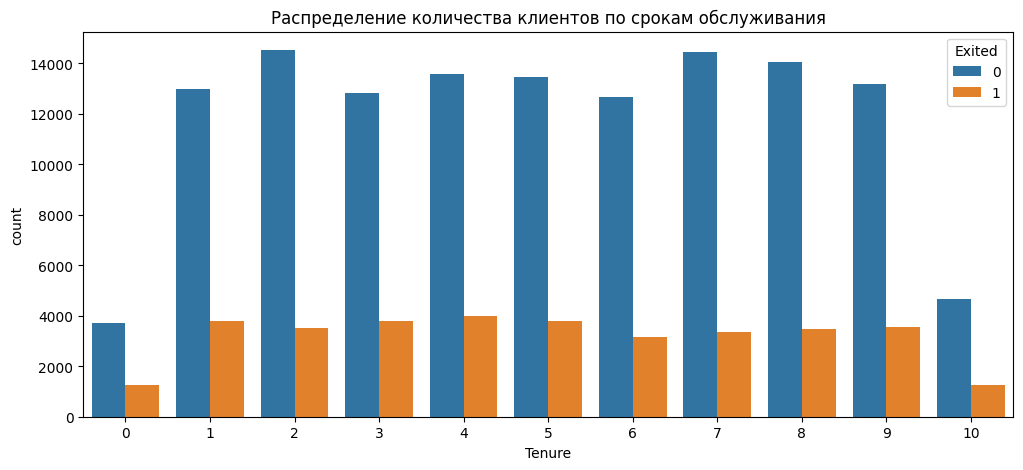

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['Tenure'],data=train,hue='Exited')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ —Å—Ä–æ–∫–∞–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è');

–ù–∞ –¥–∞–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏—Ö –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è (`Tenure`) —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ –¥–≤–µ –≥—Ä—É–ø–ø—ã: —É—à–µ–¥—à–∏–µ (`Exited=1`) –∏ –æ—Å—Ç–∞–≤—à–∏–µ—Å—è (`Exited=0`).

- –ü–æ –æ—Å–∏ X –æ—Ç–ª–æ–∂–µ–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –º–µ—Å—è—Ü–µ–≤ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è (`Tenure`), –≤–∞—Ä—å–∏—Ä—É—é—â–µ–µ—Å—è –æ—Ç 0 –¥–æ 10.  
- –ü–æ –æ—Å–∏ Y –ø–æ–∫–∞–∑–∞–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è `Tenure`.  
- –¶–≤–µ—Ç —Å—Ç–æ–ª–±—Ü–æ–≤ –æ–±–æ–∑–Ω–∞—á–∞–µ—Ç —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞: —Å–∏–Ω–∏–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è —Å –∫–æ–º–ø–∞–Ω–∏–µ–π, –æ—Ä–∞–Ω–∂–µ–≤—ã–π ‚Äî —É—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã.

**–ê–Ω–∞–ª–∏–∑:**

- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –¥–ª–∏—Ç–µ–ª—å–Ω—ã–º —Å—Ä–æ–∫–æ–º –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è (–æ—Ç 1 –¥–æ 9 –º–µ—Å—è—Ü–µ–≤) —Å—Ç–∞–±–∏–ª—å–Ω–æ –≤—ã—Å–æ–∫–æ, —Å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∫–æ–ª–µ–±–∞–Ω–∏—è–º–∏.  
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ –ø–æ –≤—Å–µ–º—É –¥–∏–∞–ø–∞–∑–æ–Ω—É `Tenure`, –±–µ–∑ —è–≤–Ω—ã—Ö –ø–∏–∫–æ–≤ –∏–ª–∏ —Å–ø–∞–¥–æ–≤, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–º —Ä–∏—Å–∫–µ –æ—Ç—Ç–æ–∫–∞ –≤–Ω–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è.  
- –î–ª—è `Tenure` —Ä–∞–≤–Ω–æ–≥–æ 0 –∏ 10 –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∑–∞–º–µ—Ç–Ω–æ –º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –ª–∏–±–æ –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏.  
- –ü—Ä–æ–ø–æ—Ä—Ü–∏—è —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫ –æ—Å—Ç–∞–≤—à–∏–º—Å—è –≤ —Å—Ä–µ–¥–Ω–µ–º —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 20-25% –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ `Tenure`.

**–í—ã–≤–æ–¥:**

- –ü—Ä–∏–∑–Ω–∞–∫ `Tenure` –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–µ–Ω –¥–ª—è –∑–∞–¥–∞—á–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞, —Ç–∞–∫ –∫–∞–∫ –æ—Ç—Ä–∞–∂–∞–µ—Ç –∂–∏–∑–Ω–µ–Ω–Ω—ã–π —Ü–∏–∫–ª –∫–ª–∏–µ–Ω—Ç–∞ –∏ —Å–≤—è–∑–∞–Ω —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —É—Ö–æ–¥–∞.  
- –ü–æ—Å–∫–æ–ª—å–∫—É —É—à–µ–¥—à–∏–µ –∫–ª–∏–µ–Ω—Ç—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø–æ –≤—Å–µ–º—É —Å–ø–µ–∫—Ç—Ä—É –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è, —Å—Ç–æ–∏—Ç —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å `Tenure` –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –≤–∫–ª—é—á–∏–≤ –≤ –º–æ–¥–µ–ª—å.  
- –î–ª—è —É–≥–ª—É–±–ª—ë–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –≤–æ–∑–º–æ–∂–Ω–æ —Å–æ–∑–¥–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ `Tenure`, –Ω–∞–ø—Ä–∏–º–µ—Ä, –±–∏–Ω–∞—Ä–Ω—ã—Ö –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–≤ –¥–ª—è –∫–æ—Ä–æ—Ç–∫–æ- –∏ –¥–æ–ª–≥–æ—Å—Ä–æ—á–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤.  
- –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–µ –∏–∑—É—á–µ–Ω–∏–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è `Tenure` —Å –¥—Ä—É–≥–∏–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –º–æ–∂–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞.


## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `Balance`

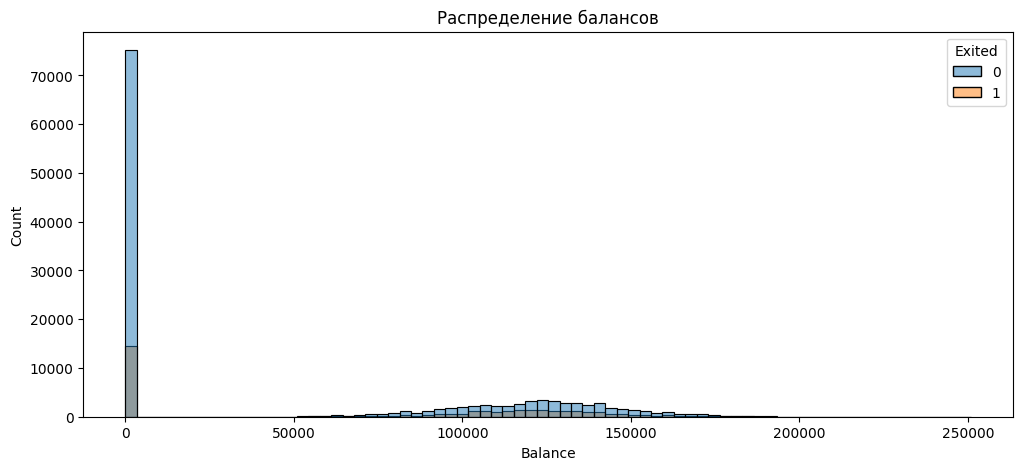

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(data=train,x=train['Balance'],bins=74, hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–∞–ª–∞–Ω—Å–æ–≤');

### –ê–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É `Balance`

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –±–∞–ª–∞–Ω—Å–∞ –Ω–∞ —Å—á—ë—Ç–µ (`Balance`), —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π ‚Äî —É—Ö–æ–¥ (`Exited=1`) –∏ —É–¥–µ—Ä–∂–∞–Ω–∏–µ (`Exited=0`).  

- **–û—Å—å X** ‚Äî —á–∏—Å–ª–æ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `Balance`, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –≤–µ–ª–∏—á–∏–Ω—É —Å—Ä–µ–¥—Å—Ç–≤ –Ω–∞ —Å—á—ë—Ç–µ –∫–ª–∏–µ–Ω—Ç–∞ (–≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ ~250 000).  
- **–û—Å—å Y** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ –∑–Ω–∞—á–µ–Ω–∏–π.  
- **–¶–≤–µ—Ç–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ** ‚Äî —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞:  
  - –≥–æ–ª—É–±–æ–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è (`Exited=0`),  
  - —Å–µ—Ä—ã–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, —É—à–µ–¥—à–∏–µ (`Exited=1`).  

---

### –ê–Ω–∞–ª–∏–∑

- –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Ä–µ–∑–∫–∞—è –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ —Ç–æ—á–∫–µ **`Balance = 0`**, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –±–æ–ª—å—à–æ–π –≥—Ä—É–ø–ø—ã –∫–ª–∏–µ–Ω—Ç–æ–≤, —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É—é—â–∏—Ö —Å—á—ë—Ç.  
- –°—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º–∏ –±–∞–ª–∞–Ω—Å–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–æ–ª–µ–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ, —Å –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∞—Ü–∏–µ–π –æ–∫–æ–ª–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ **100 000‚Äì150 000**.  
- –î–æ–ª—è —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ (`Exited=1`) –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∫–∞–∫ —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –Ω—É–ª–µ–≤—ã–º –±–∞–ª–∞–Ω—Å–æ–º, —Ç–∞–∫ –∏ —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –≤—ã—Å–æ–∫–∏–º–∏ –±–∞–ª–∞–Ω—Å–∞–º–∏.  
- –í–∏–∑—É–∞–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞ –æ—Ç —É—Ä–æ–≤–Ω—è –±–∞–ª–∞–Ω—Å–∞ –≤—ã—Ä–∞–∂–µ–Ω–∞ —Å–ª–∞–±–æ, –æ–¥–Ω–∞–∫–æ —Ñ–∞–∫—Ç –Ω–∞–ª–∏—á–∏—è/–æ—Ç—Å—É—Ç—Å—Ç–≤–∏—è –±–∞–ª–∞–Ω—Å–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å –∑–Ω–∞—á–∏–º—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º.  

---

### –í—ã–≤–æ–¥—ã

- –ü—Ä–∏–∑–Ω–∞–∫ `Balance` –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –≤–∏–¥–µ –∏–º–µ–µ—Ç **—Å–∏–ª—å–Ω—É—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é** –∏ –Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç –ª–∏–Ω–µ–π–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.  
- –î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ:  
  1. –í–≤–µ—Å—Ç–∏ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `HasBalance` (–Ω–∞–ª–∏—á–∏–µ –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –±–∞–ª–∞–Ω—Å–∞).  
  2. –†–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –±–∏–Ω–Ω–∏–Ω–≥ (—Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –±–∞–ª–∞–Ω—Å–æ–≤ –Ω–∞ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã: –Ω–∏–∑–∫–∏–π, —Å—Ä–µ–¥–Ω–∏–π, –≤—ã—Å–æ–∫–∏–π).  
  3. –ü—Ä–∏–º–µ–Ω–∏—Ç—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–ª–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—é –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.  
- –° —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –±–∏–∑–Ω–µ—Å–∞, –∫–ª–∏–µ–Ω—Ç—ã —Å –Ω—É–ª–µ–≤—ã–º –±–∞–ª–∞–Ω—Å–æ–º –º–æ–≥—É—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—Ç—å –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å–µ–≥–º–µ–Ω—Ç ‚Äî –æ–Ω–∏ —Ä–µ–¥–∫–æ –ø–æ–ª—å–∑—É—é—Ç—Å—è —É—Å–ª—É–≥–∞–º–∏ –±–∞–Ω–∫–∞ –∏ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã –∫ —É—Ö–æ–¥—É.  
- –ü—Ä–∏–∑–Ω–∞–∫ —Å—Ç–æ–∏—Ç –æ—Å—Ç–∞–≤–∏—Ç—å –≤ –º–æ–¥–µ–ª–∏, –Ω–æ –≤ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω–æ–º –∏–ª–∏ –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ, —Ç–∞–∫ –∫–∞–∫ —Å–∞–º —Ñ–∞–∫—Ç "–Ω—É–ª–µ–≤–æ–π –±–∞–ª–∞–Ω—Å vs –Ω–µ–Ω—É–ª–µ–≤–æ–π" –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –≤–∞–∂–Ω—ã–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–æ–º –æ—Ç—Ç–æ–∫–∞.  

## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∫–∞ `NumOfProducts`

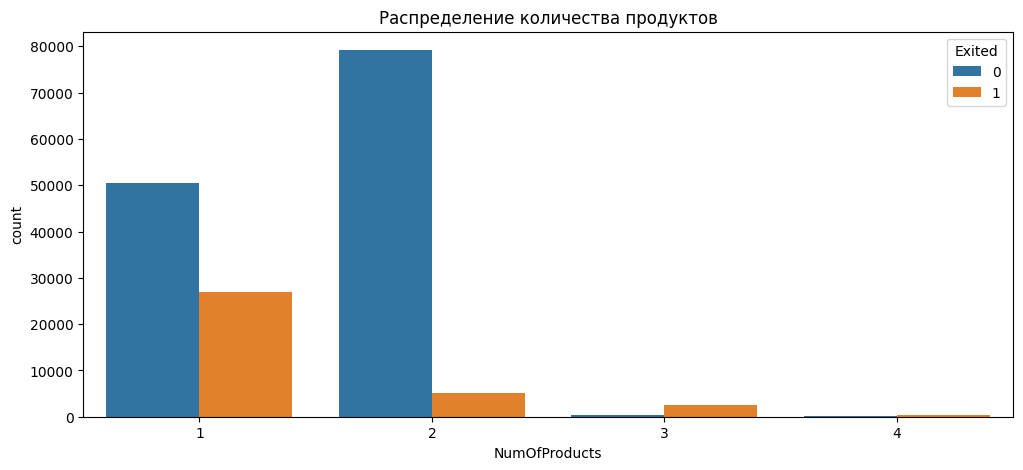

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['NumOfProducts'],data=train,hue='Exited')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤');

–ù–∞ –¥–∞–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ —É –∫–ª–∏–µ–Ω—Ç–æ–≤ (`NumOfProducts`) —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ —É—à–µ–¥—à–∏—Ö (`Exited=1`) –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (`Exited=0`) –∫–ª–∏–µ–Ω—Ç–æ–≤.

- –ü–æ –æ—Å–∏ X –æ—Ç–ª–æ–∂–µ–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–º–∏ –ø–æ–ª—å–∑—É–µ—Ç—Å—è –∫–ª–∏–µ–Ω—Ç, –æ—Ç 1 –¥–æ 4.  
- –ü–æ –æ—Å–∏ Y –ø–æ–∫–∞–∑–∞–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ `NumOfProducts`.  
- –¶–≤–µ—Ç —Å—Ç–æ–ª–±—Ü–æ–≤ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞: —Å–∏–Ω–∏–π ‚Äî –æ—Å—Ç–∞–≤—à–∏–µ—Å—è, –æ—Ä–∞–Ω–∂–µ–≤—ã–π ‚Äî —É—à–µ–¥—à–∏–µ.

**–ê–Ω–∞–ª–∏–∑:**

- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç 1 –∏–ª–∏ 2 –ø—Ä–æ–¥—É–∫—Ç–∞, –ø—Ä–∏ —ç—Ç–æ–º –∫–ª–∏–µ–Ω—Ç—ã —Å 2 –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —á–∞—â–µ –æ—Å—Ç–∞—é—Ç—Å—è —Å –∫–æ–º–ø–∞–Ω–∏–µ–π (–æ–∫–æ–ª–æ 79k) –∏ –∏–º–µ—é—Ç –Ω–∏–∑–∫–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –æ—Ç—Ç–æ–∫–∞ (–æ–∫–æ–ª–æ 5k —É—à–µ–¥—à–∏—Ö).  
- –î–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –æ–¥–Ω–∏–º –ø—Ä–æ–¥—É–∫—Ç–æ–º –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö ‚Äî –ø—Ä–∏–º–µ—Ä–Ω–æ –ø–æ–ª–æ–≤–∏–Ω–∞ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–º —Ä–∏—Å–∫–µ –æ—Ç—Ç–æ–∫–∞ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤.  
- –ö–ª–∏–µ–Ω—Ç—ã —Å 3 –∏ 4 –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–µ –≥—Ä—É–ø–ø—ã, –Ω–æ —Å—Ä–µ–¥–∏ –Ω–∏—Ö –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∞, –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è –≥—Ä—É–ø–ø—ã —Å 3 –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏. –ó–¥–µ—Å—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∞–Ω–æ–º–∞–ª—å–Ω—ã–π –ø—Ä–∏—Ä–æ—Å—Ç –æ—Ç—Ç–æ–∫–∞, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–∏–π –Ω–∞–±–æ—Ä –ø—Ä–æ–¥—É–∫—Ç–æ–≤.  

**–í—ã–≤–æ–¥—ã:**

- –ü—Ä–∏–∑–Ω–∞–∫ `NumOfProducts` —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑ –æ—Ç—Ç–æ–∫–∞: –∫–ª–∏–µ–Ω—Ç—ã —Å –º–µ–Ω—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–¥—É–∫—Ç–æ–≤ —Å–∫–ª–æ–Ω–Ω—ã —É—Ö–æ–¥–∏—Ç—å —á–∞—â–µ.  
- –ö–ª–∏–µ–Ω—Ç—ã —Å –¥–≤—É–º—è –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –Ω–∞–∏–±–æ–ª–µ–µ –ª–æ—è–ª—å–Ω—ã –∏ –∏–º–µ—é—Ç –Ω–∏–∑–∫–∏–π —Ä–∏—Å–∫ –æ—Ç—Ç–æ–∫–∞, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –≤—ã—Å–æ–∫–æ–º –≤–æ–≤–ª–µ—á–µ–Ω–∏–∏ –∏ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—ë–Ω–Ω–æ—Å—Ç–∏.  
- –î–ª—è –º–æ–¥–µ–ª–µ–π –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞ –≤–∞–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –∏ –≤–æ–∑–º–æ–∂–Ω—ã–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ—Å—Ç–∏, —Ç–∞–∫ –∫–∞–∫ —Ä–∏—Å–∫ –æ—Ç—Ç–æ–∫–∞ –Ω–µ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –ø—Ä–æ–¥—É–∫—Ç–æ–≤.  
- –†–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–Ω–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø—Ä–∏—á–∏–Ω—ã –≤—ã—Å–æ–∫–æ–π —Ç–µ–∫—É—á–µ—Å—Ç–∏ —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å 3 –∏ 4 –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏, –∞ —Ç–∞–∫–∂–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏. 


## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `HasCrCard`

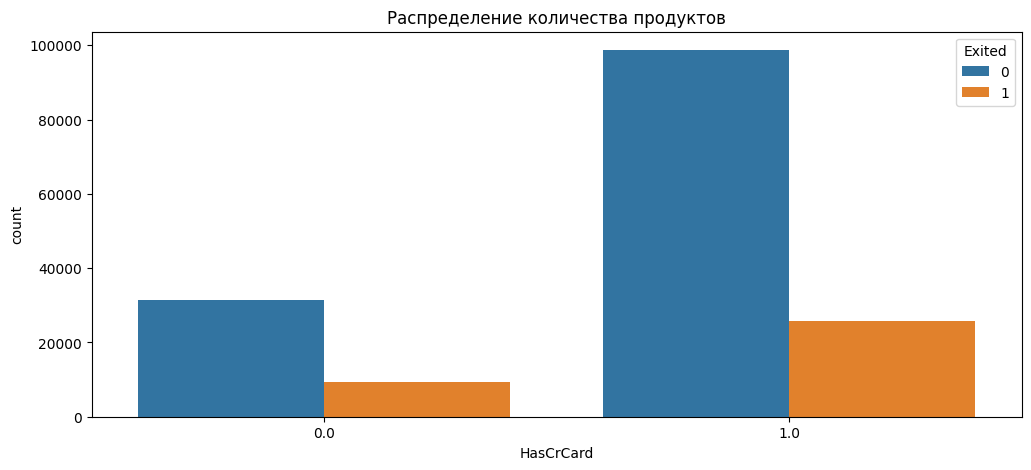

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['HasCrCard'],data=train,hue='Exited')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤');

–ù–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–∞–ª–∏—á–∏—è –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã (`HasCrCard`), —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ —É—à–µ–¥—à–∏—Ö (`Exited=1`) –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (`Exited=0`).

- –ü–æ –æ—Å–∏ X –æ—Ç–ª–æ–∂–µ–Ω –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `HasCrCard`, –ø—Ä–∏–Ω–∏–º–∞—é—â–∏–π –∑–Ω–∞—á–µ–Ω–∏—è 0 (–æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞) –∏ 1 (–µ—Å—Ç—å –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –∫–∞—Ä—Ç–∞).  
- –ü–æ –æ—Å–∏ Y –ø–æ–∫–∞–∑–∞–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.  
- –¶–≤–µ—Ç —Å—Ç–æ–ª–±—Ü–æ–≤ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞: —Å–∏–Ω–∏–π ‚Äî –æ—Å—Ç–∞–≤—à–∏–µ—Å—è, –æ—Ä–∞–Ω–∂–µ–≤—ã–π ‚Äî —É—à–µ–¥—à–∏–µ.

**–ê–Ω–∞–ª–∏–∑:**

- –ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏–º–µ—é—Ç –∫—Ä–µ–¥–∏—Ç–Ω—É—é –∫–∞—Ä—Ç—É (`HasCrCard=1`), –ø—Ä–∏—á–µ–º —Å—Ä–µ–¥–∏ –Ω–∏—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –∫–∞–∫ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è, —Ç–∞–∫ –∏ —É—à–µ–¥—à–∏—Ö.  
- –í –≥—Ä—É–ø–ø–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–µ–∑ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã (`HasCrCard=0`) –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É—à–µ–¥—à–∏—Ö –∑–∞–º–µ—Ç–Ω–æ –º–µ–Ω—å—à–µ, –Ω–æ –∏ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–∞–∫–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –º–µ–Ω—å—à–µ.  
- –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º–∞, —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ —Å–ª–∞–±–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –æ—Ç—Ç–æ–∫–æ–º.  
- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É `HasCrCard` –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã ‚Äî —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–π —Å—Ç–∞—Ç—É—Å, –Ω–æ –æ–Ω –Ω–µ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —É—Ö–æ–¥–∞.

**–í—ã–≤–æ–¥—ã:**

- –ü—Ä–∏–∑–Ω–∞–∫ `HasCrCard` –∏–º–µ–µ—Ç –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—É—é –ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω—É—é —Å–∏–ª—É –¥–ª—è –∑–∞–¥–∞—á–∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞, —Ç–∞–∫ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—à–µ–¥—à–∏—Ö –ø—Ä–∏–º–µ—Ä–Ω–æ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ —Å—Ä–µ–¥–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –∏ –±–µ–∑ –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –∫–∞—Ä—Ç—ã.  
- –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –ø—Ä–∏–∑–Ω–∞–∫ —Å—Ç–æ–∏—Ç –≤–∫–ª—é—á–∏—Ç—å –≤ –º–æ–¥–µ–ª—å, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –µ–≥–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏ –≤–æ–∑–º–æ–∂–Ω–æ–µ –≤–ª–∏—è–Ω–∏–µ –≤ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ —Å –Ω–∏–º–∏.  
- –î–ª—è –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∞–Ω–∞–ª–∏–∑—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å —Å—É–º–º—ã –ø–æ –∫—Ä–µ–¥–∏—Ç–Ω—ã–º –∫–∞—Ä—Ç–∞–º –∏–ª–∏ –¥—Ä—É–≥–∏–µ —Å–≤—è–∑–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –µ—Å–ª–∏ –æ–Ω–∏ –¥–æ—Å—Ç—É–ø–Ω—ã.  


## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `IsActiveMember`

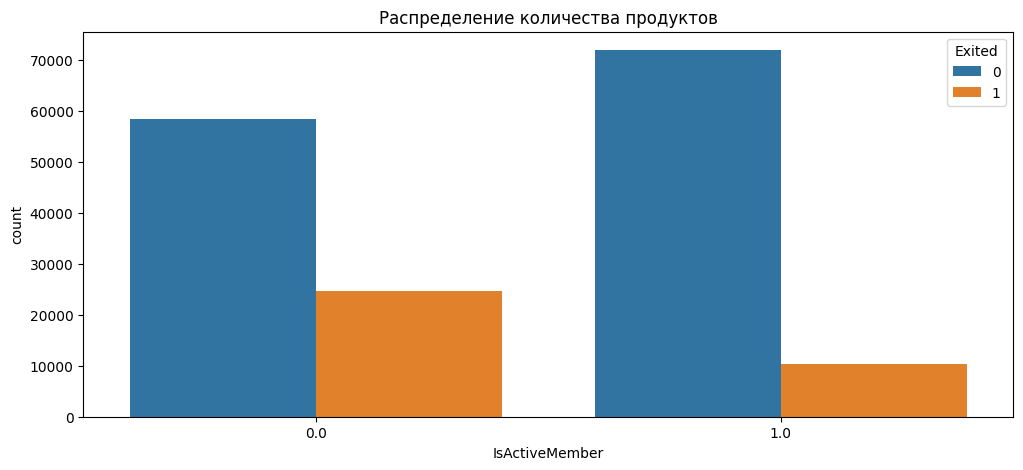

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x=train['IsActiveMember'],data=train,hue='Exited')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤');

–ù–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏—è (`IsActiveMember`), —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –Ω–∞ —É—à–µ–¥—à–∏—Ö (`Exited=1`) –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è (`Exited=0`).  

- **–û—Å—å X** ‚Äî –±–∏–Ω–∞—Ä–Ω—ã–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `IsActiveMember`:  
  - `0` ‚Äî –∫–ª–∏–µ–Ω—Ç –Ω–µ–∞–∫—Ç–∏–≤–µ–Ω (–Ω–µ –ø—Ä–æ—è–≤–ª—è–µ—Ç —Ä–µ–≥—É–ª—è—Ä–Ω–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, —Ä–µ–¥–∫–æ –ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø—Ä–æ–¥—É–∫—Ç–∞–º–∏ –∏ —É—Å–ª—É–≥–∞–º–∏ –±–∞–Ω–∫–∞),  
  - `1` ‚Äî –∫–ª–∏–µ–Ω—Ç –∞–∫—Ç–∏–≤–µ–Ω (—Ä–µ–≥—É–ª—è—Ä–Ω–æ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É–µ—Ç —Å –±–∞–Ω–∫–æ–º).  
- **–û—Å—å Y** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.  
- **–¶–≤–µ—Ç–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ** ‚Äî —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞:  
  - —Å–∏–Ω–∏–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è (`Exited=0`),  
  - –æ—Ä–∞–Ω–∂–µ–≤—ã–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, —É—à–µ–¥—à–∏–µ (`Exited=1`).  

---

### –ê–Ω–∞–ª–∏–∑

- –í –≤—ã–±–æ—Ä–∫–µ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–Ω—ã—Ö –∏ –Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ–¥–Ω–∞–∫–æ —É—Ä–æ–≤–µ–Ω—å –æ—Ç—Ç–æ–∫–∞ —Ä–∞–∑–ª–∏—á–∞–µ—Ç—Å—è.  
- –°—Ä–µ–¥–∏ **–Ω–µ–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ (`IsActiveMember=0`)** –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ, —á–µ–º —Å—Ä–µ–¥–∏ –∞–∫—Ç–∏–≤–Ω—ã—Ö. –≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –Ω–µ–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∞–ø—Ä—è–º—É—é —Å–≤—è–∑–∞–Ω–∞ —Å –ø–æ–≤—ã—à–µ–Ω–Ω—ã–º —Ä–∏—Å–∫–æ–º —É—Ö–æ–¥–∞.  
- –í –≥—Ä—É–ø–ø–µ **–∞–∫—Ç–∏–≤–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ (`IsActiveMember=1`)** –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ—Å—Ç–∞–ª–æ—Å—å –≤ –±–∞–Ω–∫–µ, –∞ –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–∞–ª–∞.  
- –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –ø—Ä–∏–∑–Ω–∞–∫ `IsActiveMember` –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —è–≤–Ω—É—é –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É—é—â—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —Å–∏–ª—å–Ω–µ–µ, —á–µ–º —Ç–∞–∫–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–∞–∫ `HasCrCard`.  

---

### –í—ã–≤–æ–¥—ã

- **–ê–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–∞ —è–≤–ª—è–µ—Ç—Å—è –∫–ª—é—á–µ–≤—ã–º –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä–æ–º –æ—Ç—Ç–æ–∫–∞.** –ù–µ–∞–∫—Ç–∏–≤–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π —Ä–∏—Å–∫ —É—Ö–æ–¥–∞, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –¥–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∫—Ä–∞–π–Ω–µ –≤–∞–∂–Ω—ã–º –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ—Å—Ç–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏.  
- –ü—Ä–∏–∑–Ω–∞–∫ `IsActiveMember` —Å–ª–µ–¥—É–µ—Ç –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –≤–∫–ª—é—á–∏—Ç—å –≤ –º–æ–¥–µ–ª—å –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –æ–±–ª–∞–¥–∞–µ—Ç –≤—ã—Å–æ–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é.  
- –î–ª—è –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ —Å—Ç–æ–∏—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –∏–∑—É—á–∏—Ç—å –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Tenure`, `Balance`, `NumOfProducts`), —á—Ç–æ–±—ã –≤—ã—è–≤–∏—Ç—å –∫–æ–º–ø–ª–µ–∫—Å–Ω—ã–µ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏ –æ—Ç—Ç–æ–∫–∞.  
- –° –±–∏–∑–Ω–µ—Å-—Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è, –¥–∞–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏ –∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏–π –ø–æ–≤—ã—à–µ–Ω–∏—è –≤–æ–≤–ª–µ—á—ë–Ω–Ω–æ—Å—Ç–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤: —á–µ–º –±–æ–ª–µ–µ –∞–∫—Ç–∏–≤–Ω–æ –∫–ª–∏–µ–Ω—Ç –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –ø—Ä–æ–¥—É–∫—Ç—ã, —Ç–µ–º –Ω–∏–∂–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ–≥–æ —É—Ö–æ–¥–∞.  


## –ê–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–∞ `EstimatedSalary`

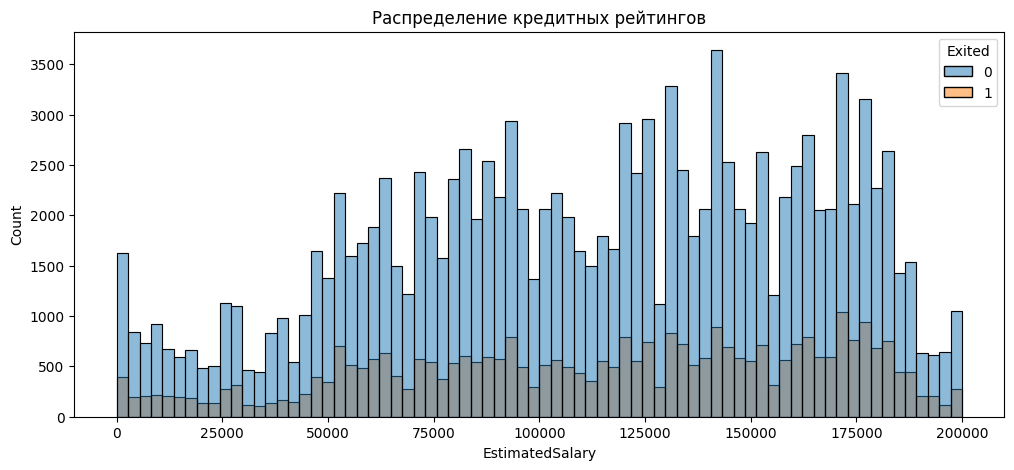

In [36]:
plt.figure(figsize=(12,5))
sns.histplot(data=train,x=train['EstimatedSalary'],bins=74, hue=train['Exited'])
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤');

–ù–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ–∫–∞–∑–∞–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º–æ–≥–æ –¥–æ—Ö–æ–¥–∞ (`EstimatedSalary`), —Å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ–º –ø–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π ‚Äî —É—Ö–æ–¥ (`Exited=1`) –∏ —É–¥–µ—Ä–∂–∞–Ω–∏–µ (`Exited=0`).  

- **–û—Å—å X** ‚Äî –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–π —á–∏—Å–ª–æ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫ `EstimatedSalary`, –æ—Ç—Ä–∞–∂–∞—é—â–∏–π –æ—Ü–µ–Ω–∫—É –≥–æ–¥–æ–≤–æ–≥–æ –¥–æ—Ö–æ–¥–∞ –∫–ª–∏–µ–Ω—Ç–∞. –î–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π: –æ—Ç 0 –¥–æ 200 000.  
- **–û—Å—å Y** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ –¥–æ—Ö–æ–¥–∞.  
- **–¶–≤–µ—Ç–æ–≤–æ–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ** ‚Äî —Å—Ç–∞—Ç—É—Å –∫–ª–∏–µ–Ω—Ç–∞:  
  - –≥–æ–ª—É–±–æ–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è (`Exited=0`),  
  - —Å–µ—Ä—ã–π ‚Äî –∫–ª–∏–µ–Ω—Ç—ã, —É—à–µ–¥—à–∏–µ (`Exited=1`).  

---

### –ê–Ω–∞–ª–∏–∑

- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –¥–æ—Ö–æ–¥—É –≤—ã–≥–ª—è–¥–∏—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ **—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–º**: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–∞—Ö –∑–∞—Ä–ø–ª–∞—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–ø–æ—Å—Ç–∞–≤–∏–º–æ, —á—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.  
- –î–æ–ª—è —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ (`Exited=1`) –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤–æ –≤—Å–µ—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞—Ö –¥–æ—Ö–æ–¥–∞ –∏ **–Ω–µ –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —è—Ä–∫–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–π –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏** –æ—Ç –≤–µ–ª–∏—á–∏–Ω—ã `EstimatedSalary`.  
- –ö–∞–∫ —Å—Ä–µ–¥–∏ –Ω–∏–∑–∫–∏—Ö –¥–æ—Ö–æ–¥–æ–≤ (–¥–æ 50 000), —Ç–∞–∫ –∏ —Å—Ä–µ–¥–∏ –≤—ã—Å–æ–∫–∏—Ö (—Å–≤—ã—à–µ 150 000) –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è –¥–æ–ª—è —É—à–µ–¥—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–∞.  
- –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–≥–æ —Ç–∏–ø–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `IsActiveMember`), –¥–∞–Ω–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å **–Ω–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —á–µ—Ç–∫–æ–π –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏–∞—Ü–∏–∏** –º–µ–∂–¥—É —É—à–µ–¥—à–∏–º–∏ –∏ –æ—Å—Ç–∞–≤—à–∏–º–∏—Å—è –∫–ª–∏–µ–Ω—Ç–∞–º–∏.  

---

### –í—ã–≤–æ–¥—ã

- –ü—Ä–∏–∑–Ω–∞–∫ `EstimatedSalary` –æ–±–ª–∞–¥–∞–µ—Ç **–Ω–∏–∑–∫–æ–π –ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω–æ–π —Ü–µ–Ω–Ω–æ—Å—Ç—å—é** –¥–ª—è –∑–∞–¥–∞—á–∏ Churn Prediction, —Ç–∞–∫ –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É—à–µ–¥—à–∏—Ö –∏ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –ø–æ –≤—Å–µ–º—É –¥–∏–∞–ø–∞–∑–æ–Ω—É –∑–Ω–∞—á–µ–Ω–∏–π.  
- –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Å–ª–∞–±—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –æ—Ç—Ç–æ–∫–æ–º, –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–Ω–æ –æ—Å—Ç–∞–≤–∏—Ç—å –≤ –º–æ–¥–µ–ª–∏ ‚Äî –æ–Ω –º–æ–∂–µ—Ç –æ–∫–∞–∑–∞—Ç—å—Å—è –ø–æ–ª–µ–∑–Ω—ã–º –≤ —Å–æ—á–µ—Ç–∞–Ω–∏–∏ —Å –¥—Ä—É–≥–∏–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å `Balance` –∏–ª–∏ `CreditScore`) –∏ –≤ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª—è—Ö.  
- –î–ª—è –±–∏–∑–Ω–µ—Å-–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏: —É—Ä–æ–≤–µ–Ω—å –¥–æ—Ö–æ–¥–∞ –∫–ª–∏–µ–Ω—Ç–∞ —Å–∞–º –ø–æ —Å–µ–±–µ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –∫–ª—é—á–µ–≤—ã–º —Ñ–∞–∫—Ç–æ—Ä–æ–º –æ—Ç—Ç–æ–∫–∞; –±–æ–ª–µ–µ –≤–∞–∂–Ω—ã –ø–æ–≤–µ–¥–µ–Ω—á–µ—Å–∫–∏–µ –∏ —Å–µ—Ä–≤–∏—Å–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ (–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ —Å –±–∞–Ω–∫–æ–º).  

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

## –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö: —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

- **–£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:** –∏–∑ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –∏—Å–∫–ª—é—á–∞—é—Ç—Å—è `id`, `CustomerId` –∏ `Surname`.  
  - `id` –∏ `CustomerId` ‚Äî —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã, –Ω–µ –Ω–µ—Å—É—â–∏–µ –ø—Ä–µ–¥–∏–∫—Ç–∏–≤–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.  
  - `Surname` ‚Äî —Å—Ç—Ä–æ–∫–æ–≤—ã–π –∞—Ç—Ä–∏–±—É—Ç, –∫–æ—Ç–æ—Ä—ã–π –≤ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –Ω–µ –∏–º–µ–µ—Ç –ø—Ä—è–º–æ–π —Å–≤—è–∑–∏ —Å –æ—Ç—Ç–æ–∫–æ–º –∏ –º–æ–∂–µ—Ç –≤–Ω–æ—Å–∏—Ç—å —à—É–º.  

- **–ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:** –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö `Geography` –∏ `Gender` –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è **One-Hot Encoding** —á–µ—Ä–µ–∑ `pd.get_dummies`.  
  - –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä `drop_first=True`, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –∏–∑–±–µ–∂–∞—Ç—å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –∑–∞ —Å—á—ë—Ç –∏—Å–∫–ª—é—á–µ–Ω–∏—è –æ–¥–Ω–æ–π –±–∞–∑–æ–≤–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏.  
  - –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø—Ä–∏–≤–æ–¥—è—Ç—Å—è –∫ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω–æ–º—É —Ç–∏–ø—É (`astype(int)`), —á—Ç–æ —É–ø—Ä–æ—â–∞–µ—Ç –∏—Ö –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π.  

**–ò—Ç–æ–≥:** –¥–∞—Ç–∞—Å–µ—Ç—ã –æ—á–∏—â–µ–Ω—ã –æ—Ç –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö –ø–æ–ª–µ–π, –∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–µ—Ä–µ–≤–µ–¥–µ–Ω—ã –≤ —á–∏—Å–ª–æ–≤–æ–π —Ñ–æ—Ä–º–∞—Ç, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –∏—Ö –ø—Ä–∏–≥–æ–¥–Ω—ã–º–∏ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π.  


In [37]:
train.drop(['id','CustomerId','Surname'], inplace= True, axis = 1)
test.drop(['id','CustomerId','Surname'], inplace= True, axis = 1)

In [38]:
train = pd.get_dummies(train, columns=['Geography','Gender'], drop_first=True).astype(int)


In [39]:
test = pd.get_dummies(test, columns=['Geography','Gender'], drop_first=True).astype(int)

# Feature Engineering

–î–ª—è —É–ª—É—á—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–µ–π –º—ã –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.  
–ù–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è `create_features`, –∫–æ—Ç–æ—Ä–∞—è —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç –Ω–æ–≤—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –∫–ª–∏–µ–Ω—Ç–æ–≤.

### üìå –°–ø–∏—Å–æ–∫ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

- **CreditScorePerAge** ‚Äî –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫—Ä–µ–¥–∏—Ç–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞ –∫ –≤–æ–∑—Ä–∞—Å—Ç—É –∫–ª–∏–µ–Ω—Ç–∞.  
- **CreditUtilization** ‚Äî –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –±–∞–ª–∞–Ω—Å–∞ –∫ –∑–∞—Ä–ø–ª–∞—Ç–µ (–ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –Ω–∞–≥—Ä—É–∑–∫–∏).  
- **ProductsPerAge** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –¥–µ–ª—ë–Ω–Ω–æ–µ –Ω–∞ –≤–æ–∑—Ä–∞—Å—Ç (–∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è).  
- **BalancePerProduct** ‚Äî –±–∞–ª–∞–Ω—Å, –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤.  
- **LogBalance**, **LogEstimatedSalary** ‚Äî –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –±–∞–ª–∞–Ω—Å –∏ –∑–∞—Ä–ø–ª–∞—Ç–∞ –¥–ª—è —Å–Ω–∏–∂–µ–Ω–∏—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏.  
- **TenurePerAge** ‚Äî —Å—Ç–∞–∂ –≤ –±–∞–Ω–∫–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤–æ–∑—Ä–∞—Å—Ç–∞.  

#### –ò–Ω–∂–µ–Ω–µ—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏:
- **activity/balance** ‚Äî 1, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç –∞–∫—Ç–∏–≤–µ–Ω –∏–ª–∏ –∏–º–µ–µ—Ç –±–∞–ª–∞–Ω—Å > 0.  
- **combined_info** ‚Äî –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥—É–∫—Ç–æ–≤, –∫–∞—Ä—Ç—ã –∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.  

#### –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø–æ—Ä–æ–≥–∞–º–∏:
- **HighBalance_Inactive** ‚Äî –≤—ã—Å–æ–∫–∏–π –±–∞–ª–∞–Ω—Å, –Ω–æ –∫–ª–∏–µ–Ω—Ç –Ω–µ –∞–∫—Ç–∏–≤–µ–Ω.  
- **LowBalance_Active** ‚Äî –Ω–∏–∑–∫–∏–π –±–∞–ª–∞–Ω—Å –ø—Ä–∏ –≤—ã—Å–æ–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.  
- **SingleProduct_NoCard** ‚Äî —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –ø—Ä–æ–¥—É–∫—Ç –∏ –Ω–µ—Ç –∫–∞—Ä—Ç—ã.  
- **LongTenure_Active** ‚Äî –¥–æ–ª–≥–∏–π —Å—Ç–∞–∂ –∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  

#### –í–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- **NumProducts_x_Active** ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤ √ó –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  
- **HasCrCard_x_Active** ‚Äî –Ω–∞–ª–∏—á–∏–µ –∫–∞—Ä—Ç—ã √ó –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  
- **Balance_x_Active** ‚Äî –±–∞–ª–∞–Ω—Å √ó –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  
- **EstimatedSalary_x_Active** ‚Äî –∑–∞—Ä–ø–ª–∞—Ç–∞ √ó –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å.  
- **CreditScore_x_NumProductsPerAge** ‚Äî –∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ √ó –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è.  

#### –ö–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å:
- **EngagementScore** ‚Äî —Å—É–º–º–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏: –∞–∫—Ç–∏–≤–Ω—ã–π —Å—Ç–∞—Ç—É—Å + –Ω–∞–ª–∏—á–∏–µ –∫–∞—Ä—Ç—ã + –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥—É–∫—Ç–æ–≤.  

–≠—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ–º–æ–≥–∞—é—Ç –ª—É—á—à–µ –∑–∞—Ö–≤–∞—Ç–∏—Ç—å —Å–∫—Ä—ã—Ç—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –∏ —Å–µ–≥–º–µ–Ω—Ç—ã –∫–ª–∏–µ–Ω—Ç–æ–≤.

In [40]:
def create_features(data, balance_median, tenure_median):
    data = data.copy()
    
    data['CreditScorePerAge'] = data['CreditScore'] / data['Age']
    data['CreditUtilization'] = data['Balance'] / (data['EstimatedSalary'] + 1e-6)
    data['ProductsPerAge'] = data['NumOfProducts'] / data['Age']
    data['BalancePerProduct'] = data['Balance'] / (data['NumOfProducts'] + 1)
    data['LogBalance'] = np.log1p(data['Balance'])
    data['LogEstimatedSalary'] = np.log1p(data['EstimatedSalary'])
    data['TenurePerAge'] = data['Tenure'] / data['Age']

    data['activity/balance'] = ((data['IsActiveMember']==1) | (data['Balance']>0)).astype(int)
    data['combined_info'] = (data['NumOfProducts'] + data['HasCrCard']) * data['IsActiveMember']

    data['HighBalance_Inactive'] = ((data['Balance'] >= balance_median) & (data['IsActiveMember']==0)).astype(int)
    data['LowBalance_Active'] = ((data['Balance'] < balance_median) & (data['IsActiveMember']==1)).astype(int)
    data['SingleProduct_NoCard'] = ((data['NumOfProducts']==1) & (data['HasCrCard']==0)).astype(int)
    data['LongTenure_Active'] = ((data['Tenure'] >= tenure_median) & (data['IsActiveMember']==1)).astype(int)

    data['NumProducts_x_Active'] = data['NumOfProducts'] * data['IsActiveMember']
    data['HasCrCard_x_Active'] = data['HasCrCard'] * data['IsActiveMember']
    data['Balance_x_Active'] = data['Balance'] * data['IsActiveMember']
    data['EstimatedSalary_x_Active'] = data['EstimatedSalary'] * data['IsActiveMember']
    data['CreditScore_x_NumProductsPerAge'] = data['CreditScore'] * data['ProductsPerAge']

    data['EngagementScore'] = data['IsActiveMember'] + data['HasCrCard'] + data['NumOfProducts']
    
    return data

In [41]:
balance_median = train['Balance'].median()
tenure_median = train['Tenure'].median()

In [42]:
train = create_features(train,balance_median,tenure_median)
test = create_features(test,balance_median,tenure_median)

In [43]:
new_features = [
    'CreditScorePerAge', 'CreditUtilization', 'ProductsPerAge', 'BalancePerProduct',
    'LogBalance', 'LogEstimatedSalary', 'TenurePerAge',
    'activity/balance', 'combined_info',
    'HighBalance_Inactive', 'LowBalance_Active', 'SingleProduct_NoCard', 'LongTenure_Active',
    'NumProducts_x_Active', 'HasCrCard_x_Active', 'Balance_x_Active', 'EstimatedSalary_x_Active',
    'CreditScore_x_NumProductsPerAge', 'EngagementScore'
]

corr_with_target = train[new_features + ['Exited']].corr()['Exited'].sort_values(ascending=False)
print("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å Exited:")
print(corr_with_target)
print("\n" + "="*50 + "\n")

# --- –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –º–µ–∂–¥—É –Ω–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ ---
corr_matrix = train[new_features].corr().abs()

# –ò—â–µ–º –ø–∞—Ä—ã —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–±–µ–∑ –ø–æ–≤—Ç–æ—Ä–æ–≤ –∏ –¥–∏–∞–≥–æ–Ω–∞–ª–∏)
threshold = 0.8
already_reported = set()
print("–°–∏–ª—å–Ω–æ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å):")
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and corr_matrix.loc[i, j] > threshold:
            pair = tuple(sorted([i,j]))
            if pair not in already_reported:
                already_reported.add(pair)
                print(f"{pair[0]} ‚Üî {pair[1]} : {corr_matrix.loc[i,j]:.2f}")

–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å Exited:
Exited                             1.000000
HighBalance_Inactive               0.210237
BalancePerProduct                  0.137106
LogBalance                         0.133551
SingleProduct_NoCard               0.132625
LogEstimatedSalary                 0.013461
CreditUtilization                  0.001452
activity/balance                  -0.030037
Balance_x_Active                  -0.059361
TenurePerAge                      -0.130463
LongTenure_Active                 -0.138830
EstimatedSalary_x_Active          -0.173004
HasCrCard_x_Active                -0.178343
combined_info                     -0.230013
NumProducts_x_Active              -0.233131
EngagementScore                   -0.267920
CreditScorePerAge                 -0.287184
CreditScore_x_NumProductsPerAge   -0.310295
ProductsPerAge                    -0.320201
LowBalance_Active                       NaN
Name: Exited, dtype: float64


–°–∏–ª—å–Ω–æ–∫–æ—Ä—Ä–µ–ª–∏—

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –ø—Ä–æ–≤–µ–¥—ë–Ω –∞–Ω–∞–ª–∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —Å–æ–∑–¥–∞–Ω–Ω—ã—Ö –Ω–∞ —ç—Ç–∞–ø–µ feature engineering. –û—Å–Ω–æ–≤–Ω—ã–µ —Ü–µ–ª–∏:

1. **–û—Ü–µ–Ω–∫–∞ –≤–ª–∏—è–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é (`Exited`)**  
   - –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å `Exited` –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤—ã—è–≤–∏—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, —Å–∏–ª—å–Ω–µ–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—â–∏–µ –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—Ç—Ç–æ–∫–∞.  
   - –ù–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ: `ProductsPerAge`, `CreditScore_x_NumProductsPerAge`, `EngagementScore`.  
   - –ú–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º—ã–µ: –±–∞–ª–∞–Ω—Å –∏ –∑–∞—Ä–ø–ª–∞—Ç–∞.

2. **–í—ã—è–≤–ª–µ–Ω–∏–µ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏**  
   - –ü–∞—Ä—ã —Å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π >0.8 —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ –¥—É–±–ª–∏—Ä—É—é—â—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.  
   - –ù–∞–ø—Ä–∏–º–µ—Ä, `CreditScore_x_NumProductsPerAge ‚Üî ProductsPerAge`, `NumProducts_x_Active ‚Üî combined_info`.  
   - –°–∏–ª—å–Ω–æ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å —É–¥–∞–ª–µ–Ω—ã –∏–ª–∏ –æ–±—ä–µ–¥–∏–Ω–µ–Ω—ã –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

3. **–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ –ø–æ –æ—á–∏—Å—Ç–∫–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**  
   - –£–¥–∞–ª–∏—Ç—å –¥—É–±–ª–∏—Ä—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ –º–∞–ª–æ–ø–æ–ª–µ–∑–Ω—ã–µ, —Ç–∞–∫–∏–µ –∫–∞–∫ `LowBalance_Active` —Å NaN –∏–ª–∏ —Å–ª–∞–±–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π.  
   - –û—Å—Ç–∞–≤–∏—Ç—å –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ: `ProductsPerAge`, `CreditScorePerAge`, `EngagementScore`, `TenurePerAge`, `activity/balance`, `Balance`, `LogBalance`, `LogEstimatedSalary`, `SingleProduct_NoCard`, `LongTenure_Active`.


# Feature Selection

–ü–æ—Å–ª–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –Ω–æ–≤—ã—Ö —Ñ–∏—á –≤–∞–∂–Ω–æ —É–±—Ä–∞—Ç—å –º–µ–Ω–µ–µ –ø–æ–ª–µ–∑–Ω—ã–µ, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –∏ —Å–Ω–∏–∑–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö.  

–ú—ã —É–¥–∞–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑–∞–ª–∏ –Ω–∏–∑–∫—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –∏–ª–∏ —Å–∏–ª—å–Ω—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é —Å –¥—Ä—É–≥–∏–º–∏:

- **CreditScore_x_NumProductsPerAge** ‚Äî —Å–ª–∞–±–æ–µ –≤–ª–∏—è–Ω–∏–µ, –∏–∑–±—ã—Ç–æ—á–Ω–∞—è –∫–æ–º–±–∏–Ω–∞—Ü–∏—è.  
- **BalancePerProduct** ‚Äî –≤—ã—Å–æ–∫–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å –¥—Ä—É–≥–∏–º–∏ –±–∞–ª–∞–Ω—Å–Ω—ã–º–∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏.  
- **combined_info** ‚Äî —Å–ª–∏—à–∫–æ–º –∞–≥—Ä–µ–≥–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —É—Ö—É–¥—à–∞–ª –∫–∞—á–µ—Å—Ç–≤–æ.  
- **NumProducts_x_Active** ‚Äî –ø–µ—Ä–µ—Å–µ–∫–∞–µ—Ç—Å—è —Å –¥—Ä—É–≥–∏–º–∏ —Ñ–∏—á–∞–º–∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.  
- **HighBalance_Inactive** ‚Äî –æ–∫–∞–∑–∞–ª–∞—Å—å –º–µ–Ω–µ–µ –∑–Ω–∞—á–∏–º–æ–π.  
- **HasCrCard_x_Active** ‚Äî –¥—É–±–ª–∏—Ä—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.  
- **EstimatedSalary_x_Active** ‚Äî –Ω–∏–∑–∫–∞—è –≤–∞–∂–Ω–æ—Å—Ç—å –ø–æ feature importance.  
- **LowBalance_Active** ‚Äî —Ç–∞–∫–∂–µ –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∞ –≤—ã—Å–æ–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏.  

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å–æ—Ö—Ä–∞–Ω—è–µ–º –±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã–π –∏ –∫–æ–º–ø–∞–∫—Ç–Ω—ã–π –Ω–∞–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏.

In [44]:
features_to_drop = [
    'CreditScore_x_NumProductsPerAge',
    'BalancePerProduct',
    'combined_info',
    'NumProducts_x_Active',
    'HighBalance_Inactive',
    'HasCrCard_x_Active',
    'EstimatedSalary_x_Active',
    'LowBalance_Active'
]

train = train.drop(columns=features_to_drop)
test = test.drop(columns=features_to_drop)

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ

–î–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ä–∞–±–æ—Ç—ã –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫ –æ–¥–Ω–æ–º—É –º–∞—Å—à—Ç–∞–±—É.  
–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, `Balance`, `EstimatedSalary`) –∏–º–µ—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, —á–µ–º –¥—Ä—É–≥–∏–µ (`ProductsPerAge`, `TenurePerAge`). –≠—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —Å–º–µ—â–µ–Ω–∏—é –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏.  

–ú—ã –ø—Ä–∏–º–µ–Ω–∏–ª–∏ **StandardScaler**, –∫–æ—Ç–æ—Ä—ã–π —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä—É–µ—Ç –¥–∞–Ω–Ω—ã–µ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:

$ x' = \frac{x - \mu}{\sigma} $

–≥–¥–µ $ \mu $ ‚Äî —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞, $ \sigma $ ‚Äî —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ.  

–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:  
- `CreditScorePerAge`  
- `CreditUtilization`  
- `ProductsPerAge`  
- `LogBalance`  
- `LogEstimatedSalary`  
- `TenurePerAge`  
- `Balance`  
- `EstimatedSalary`  
- `EngagementScore`  

–¢–µ–ø–µ—Ä—å –≤—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–º–µ—é—Ç **—Å—Ä–µ–¥–Ω–µ–µ = 0** –∏ **—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ = 1**, —á—Ç–æ –¥–µ–ª–∞–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –±–æ–ª–µ–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–º.

In [45]:
numeric_features_to_scale = [
    'CreditScorePerAge', 'CreditUtilization', 'ProductsPerAge',
    'LogBalance', 'LogEstimatedSalary', 'TenurePerAge',
    'Balance', 'EstimatedSalary',
    'EngagementScore'
]

In [46]:
scaler = StandardScaler()

In [47]:
train[numeric_features_to_scale] = scaler.fit_transform(train[numeric_features_to_scale])
test[numeric_features_to_scale] = scaler.transform(test[numeric_features_to_scale])

# –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

## Train/Validation Split

–ü–æ—Å–ª–µ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö –º—ã —Ä–∞–∑–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫—É –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `train_test_split` –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `scikit-learn`.  

- **–ü—Ä–∏–∑–Ω–∞–∫–∏ (X):** –≤—Å–µ —Å—Ç–æ–ª–±—Ü—ã –∫—Ä–æ–º–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `Exited`.  
- **–¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (y):** –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `Exited`, —É–∫–∞–∑—ã–≤–∞—é—â–∏–π, —É—à—ë–ª –ª–∏ –∫–ª–∏–µ–Ω—Ç –∏–∑ –±–∞–Ω–∫–∞.  
- **–†–∞–∑–º–µ—Ä –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:** 20% –¥–∞–Ω–Ω—ã—Ö (`test_size=0.2`).  

–¢–∞–∫–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç:  
1. –û–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.  
2. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –µ—ë –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ, –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–≤—à–µ–π –≤ –æ–±—É—á–µ–Ω–∏–∏.  
3. –°–Ω–∏–∑–∏—Ç—å —Ä–∏—Å–∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è –∏ –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª–µ–µ —á–µ—Å—Ç–Ω—É—é –æ—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏.

In [48]:
X = train.drop('Exited',axis = 1)
y = train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

## –†–∞—Å—á—ë—Ç –≤–µ—Å–∞ –¥–ª—è –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∫–∏ –∫–ª–∞—Å—Å–æ–≤

–í –∑–∞–¥–∞—á–µ Churn Prediction –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞—é—Ç—Å—è ($y=0$), –∑–∞–º–µ—Ç–Ω–æ –±–æ–ª—å—à–µ —á–∏—Å–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —É—Ö–æ–¥—è—Ç ($y=1$).  
–ß—Ç–æ–±—ã –º–æ–¥–µ–ª—å –Ω–µ –±—ã–ª–∞ —Å–º–µ—â–µ–Ω–∞ –≤ —Å—Ç–æ—Ä–æ–Ω—É "–±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞", –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä **`scale_pos_weight`**.

–†–∞—Å—á—ë—Ç –≤–µ—Å–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:  

$ \text{scale\_pos\_weight} = \dfrac{\text{num\_neg}}{\text{num\_pos}} $

–≥–¥–µ:  
- $ \text{num\_neg} $ ‚Äî —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–ª–∞—Å—Å–∞ $0$ (–∫–ª–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–ª–∏—Å—å),  
- $ \text{num\_pos} $ ‚Äî —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –∫–ª–∞—Å—Å–∞ $1$ (–∫–ª–∏–µ–Ω—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ —É—à–ª–∏).  

–≠—Ç–æ—Ç –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ø–µ—Ä–µ–¥–∞—ë—Ç—Å—è –≤ –º–æ–¥–µ–ª–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, XGBoost –∏–ª–∏ LightGBM) –∏ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç "–≤–µ—Å" –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞, —á—Ç–æ –ø–æ–º–æ–≥–∞–µ—Ç –ª—É—á—à–µ —É—á–∏—Ç—ã–≤–∞—Ç—å —Ä–µ–¥–∫–∏–µ —Å–ª—É—á–∞–∏ —É—Ö–æ–¥–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏.

In [49]:
num_neg = sum(y == 0)
num_pos = sum(y == 1)
scale_pos_weight = num_neg / num_pos

## –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º—Ç–µ—Ä–æ–≤ –¥–ª—è XGBoost

–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è **Optuna**, –≤—ã–ø–æ–ª–Ω—è—é—â–∞—è –±–∞–π–µ—Å–æ–≤—Å–∫–∏–π –ø–æ–∏—Å–∫ –ø–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤—É –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.  

### –ü–æ–¥–±–∏—Ä–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
- `n_estimators` ‚Äî —á–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤ ($100 \leq n \leq 1000$).  
- `max_depth` ‚Äî –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤ ($3 \leq d \leq 10$).  
- `learning_rate` ‚Äî —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è ($0.01$‚Äì$0.3$, –ª–æ–≥. —à–∫–∞–ª–∞).  
- `subsample` ‚Äî –¥–æ–ª—è –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –¥–µ—Ä–µ–≤–æ ($0.5$‚Äì$1.0$).  
- `colsample_bytree` ‚Äî –¥–æ–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ ($0.5$‚Äì$1.0$).  
- `gamma` ‚Äî –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —É–ª—É—á—à–µ–Ω–∏–µ –¥–ª—è —Ä–∞–∑–±–∏–µ–Ω–∏—è —É–∑–ª–∞.  
- `reg_alpha`, `reg_lambda` ‚Äî $L1$ –∏ $L2$ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.  

–§–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ: `random_state=42`, `eval_metric='logloss'`.  

### –û—Ü–µ–Ω–∫–∞
–ö–∞—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ **5-–∫—Ä–∞—Ç–Ω—É—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é** –∏ –º–µ—Ç—Ä–∏–∫—É **ROC-AUC**:  

$ \text{score} = \text{mean}(\text{ROC-AUC}_{CV=5}) $

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
- 30 –∏—Ç–µ—Ä–∞—Ü–∏–π –ø–æ–∏—Å–∫–∞ (`n_trials=30`), —Ü–µ–ª—å ‚Äî **–º–∞–∫—Å–∏–º–∏–∑–∞—Ü–∏—è ROC-AUC**.  
- –í `best_xgb_params` —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –ª—É—á—à–∏–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏.  

–ò—Ç–æ–≥ ‚Äî –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –ø–æ–≤—ã—à–∞—é—â–∏–µ —Ç–æ—á–Ω–æ—Å—Ç—å –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ XGBoost.

In [50]:
def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'eval_metric':'logloss'
    }
    model = XGBClassifier(**params, use_label_encoder=False, verbosity=0)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
best_xgb_params = study_xgb.best_params

## –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è LightGBM

–î–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è **Optuna**, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–¥–±–∏—Ä–∞–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ LightGBM.  

### –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã
- `n_estimators` ‚Äî —á–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤ ($100 \leq n\_estimators \leq 1000$).  
- `max_depth` ‚Äî –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤ ($3 \leq max\_depth \leq 10$).  
- `learning_rate` ‚Äî —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è (–æ—Ç $0.01$ –¥–æ $0.3$, –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è —à–∫–∞–ª–∞).  
- `num_leaves` ‚Äî –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –ª–∏—Å—Ç—å–µ–≤ –≤ –¥–µ—Ä–µ–≤–µ (–∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ—Ç —Å–ª–æ–∂–Ω–æ—Å—Ç—å, $20 \leq num\_leaves \leq 150$).  
- `min_child_samples` ‚Äî –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –≤ –ª–∏—Å—Ç–µ (—Ä–µ–≥—É–ª–∏—Ä—É–µ—Ç –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, $5 \leq min\_child\_samples \leq 100$).  
- `subsample` ‚Äî –¥–æ–ª—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –¥–µ—Ä–µ–≤–∞ ($0.5 \leq subsample \leq 1.0$).  
- `colsample_bytree` ‚Äî –¥–æ–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –¥–µ—Ä–µ–≤–∞ ($0.5 \leq colsample\_bytree \leq 1.0$).  
- `reg_alpha` ‚Äî $L1$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.  
- `reg_lambda` ‚Äî $L2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è.  

–§–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  
- `random_state = 42` ‚Äî –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å.  

### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
–î–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª—å –ø—Ä–æ–≤–µ—Ä—è–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é **5-–∫—Ä–∞—Ç–Ω–æ–π –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏** –∏ –º–µ—Ç—Ä–∏–∫–∏ **ROC-AUC**:  

$ \text{score} = \text{mean}\left(\text{ROC-AUC}_{CV=5}\right) $

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
- Optuna —Å–æ–∑–¥–∞—ë—Ç –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∏ –∑–∞–ø—É—Å–∫–∞–µ—Ç 30 –∏—Å–ø—ã—Ç–∞–Ω–∏–π.  
- –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –≤ `best_lgb_params`.  

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –º—ã –ø–æ–ª—É—á–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã LightGBM, —á—Ç–æ –ø–æ–≤—ã—à–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –¥–∏—Å–±–∞–ª–∞–Ω—Å–µ –∫–ª–∞—Å—Å–æ–≤.

In [51]:
def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'verbose': -1
    }
    model = LGBMClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study_lgb = optuna.create_study(direction='maximize')
study_lgb.optimize(objective_lgb, n_trials=30)
best_lgb_params = study_lgb.best_params

## –û–ø—Ç–∏–º–∞–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è CatBoost

–° –ø–æ–º–æ—â—å—é **Optuna** –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –ø–æ–∏—Å–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–∏ `CatBoostClassifier`.  

### –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
- `iterations` ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π (–¥–µ—Ä–µ–≤—å–µ–≤) –≤ –∞–Ω—Å–∞–º–±–ª–µ.  
- `depth` ‚Äî –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤—å–µ–≤, –∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É—é—â–∞—è —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.  
- `learning_rate` ‚Äî —à–∞–≥ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ (–æ—Ç $0.01$ –¥–æ $0.3$).  
- `l2_leaf_reg` ‚Äî –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç $L2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.  
- `border_count` ‚Äî —á–∏—Å–ª–æ –±–∏–Ω–æ–≤ –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.  

–§–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:  
- `random_state = 42` ‚Äî –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç—å.  
- `verbose = 0` ‚Äî –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ –ª–∏—à–Ω–µ–≥–æ –≤—ã–≤–æ–¥–∞.  

### –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞
–î–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª—å –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –ø–æ **ROC-AUC** —Å –ø–æ–º–æ—â—å—é **5-–∫—Ä–∞—Ç–Ω–æ–π –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏**.  

### –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
- `study_cat` –∏—â–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, **–º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É—é—â–∏–µ ROC-AUC**.  
- –ü–æ—Å–ª–µ 30 –∏—Ç–µ—Ä–∞—Ü–∏–π —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è –ª—É—á—à–∏–π –Ω–∞–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤:  
  `best_cat_params = study_cat.best_params`.  

–í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∞–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å CatBoost –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

In [52]:
def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_state': 42,
        'verbose': 0
    }
    model = CatBoostClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return score

study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=30)
best_cat_params = study_cat.best_params

## –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

–í —ç—Ç–æ–º –±–ª–æ–∫–µ —Å–æ–∑–¥–∞—é—Ç—Å—è —Ç—Ä–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞ –¥–ª—è –∑–∞–¥–∞—á–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–∞–∂–¥—ã–π –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç—Å—è —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ **Optuna**:

- **XGBClassifier** (XGBoost) ‚Äî —Å –Ω–∞—Å—Ç—Ä–æ–π–∫–∞–º–∏, –≤–∫–ª—é—á–∞—è –æ—Ç–∫–ª—é—á–µ–Ω–∏–µ —É—Å—Ç–∞—Ä–µ–≤—à–µ–≥–æ —ç–Ω–∫–æ–¥–µ—Ä–∞ –º–µ—Ç–æ–∫, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–π –ø–æ—Ç–µ—Ä–∏, –∫–æ–º–ø–µ–Ω—Å–∞—Ü–∏—é –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ —á–µ—Ä–µ–∑ `scale_pos_weight`, —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å–ª—É—á–∞–π–Ω–æ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –∏ –±–µ–∑ –≤—ã–≤–æ–¥–∞ –ª–æ–≥–æ–≤.
- **LGBMClassifier** (LightGBM) ‚Äî —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Å–ª—É—á–∞–π–Ω—ã–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º.
- **CatBoostClassifier** (CatBoost) ‚Äî –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ, —Å –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Å–ª—É—á–∞–π–Ω—ã–º —Å–æ—Å—Ç–æ—è–Ω–∏–µ–º –∏ –æ—Ç–∫–ª—é—á—ë–Ω–Ω—ã–º –≤—ã–≤–æ–¥–æ–º –ø–æ–¥—Ä–æ–±–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

–≠—Ç–æ—Ç –±–ª–æ–∫ –ø–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ—Ç —Ç—Ä–∏ —Å–∏–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è –∏ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–≥–Ω–æ–∑–∞.

In [53]:
xgb_model = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42, verbosity=0)
lgb_model = LGBMClassifier(**best_lgb_params, random_state=42)
cat_model = CatBoostClassifier(**best_cat_params, random_state=42, verbose=0)

## –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –æ–±—É—á–µ–Ω–∏–µ —Ç—Ä—ë—Ö –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤ (XGBoost, LightGBM –∏ CatBoost) –Ω–∞ –≤—Ö–æ–¥–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö `X` –∏ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π `y`. 

–ö–∞–∂–¥–∞—è –º–æ–¥–µ–ª—å –ø–æ–¥—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç —Å–≤–æ–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –Ω–∞—É—á–∏—Ç—å—Å—è —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞—Ç—å –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç–∏, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–ª—è —Ç–æ—á–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ—Ç—Ç–æ–∫–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤.

In [54]:
xgb_model.fit(X, y)
lgb_model.fit(X, y)
cat_model.fit(X, y)

## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–í —ç—Ç–æ–º –±–ª–æ–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–π –∏–∑ –æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π (XGBoost, LightGBM –∏ CatBoost) –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–æ–≤ –∫ –∫–ª–∞—Å—Å—É –æ—Ç—Ç–æ–∫–∞ (—Ü–µ–ª–µ–≤–æ–π –∫–ª–∞—Å—Å = 1) –Ω–∞ –æ–±—É—á–∞—é—â–µ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö `X`.

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω—è—é—Ç—Å—è –≤ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö `xgb_pred_train`, `lgb_pred_train` –∏ `cat_pred_train` –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

In [55]:
xgb_pred_train = xgb_model.predict_proba(X)[:,1]
lgb_pred_train = lgb_model.predict_proba(X)[:,1]
cat_pred_train = cat_model.predict_proba(X)[:,1]

## –ü–æ–¥–±–æ—Ä –≤–µ—Å–æ–≤ –¥–ª—è –±–ª–µ–Ω–¥–∏–Ω–≥–∞

–≠—Ç–æ—Ç –±–ª–æ–∫ —Ä–µ–∞–ª–∏–∑—É–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—é –≤–∑–≤–µ—à–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏—è (–±–ª–µ–Ω–¥–∏–Ω–≥–∞) –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Ç—Ä—ë—Ö –º–æ–¥–µ–ª–µ–π (XGBoost, LightGBM –∏ CatBoost) —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ **Optuna**.

- –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è `objective_blend`, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–±–∏—Ä–∞–µ—Ç –≤–µ—Å–∞ \(w_1, w_2, w_3\) –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1, –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ—Ç –∏—Ö, –∞ –∑–∞—Ç–µ–º —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç –≤–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Å—É–º–º–∞—Ä–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ.
- –ö–∞—á–µ—Å—Ç–≤–æ –±–ª–µ–Ω–¥–∞ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –º–µ—Ç—Ä–∏–∫–æ–π ROC AUC –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö.
- –ó–∞–ø—É—Å–∫–∞–µ—Ç—Å—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Å 50 –∏—Ç–µ—Ä–∞—Ü–∏—è–º–∏ –¥–ª—è –ø–æ–∏—Å–∫–∞ –≤–µ—Å–æ–≤, –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É—é—â–∏—Ö ROC AUC.
- –ò—Ç–æ–≥–æ–≤—ã–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞ –≤—ã–≤–æ–¥—è—Ç—Å—è –≤ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–º –≤–∏–¥–µ.

–≠—Ç–æ—Ç –ø–æ–¥—Ö–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç —É–ª—É—á—à–∏—Ç—å –∏—Ç–æ–≥–æ–≤—É—é —Ç–æ—á–Ω–æ—Å—Ç—å –∑–∞ —Å—á—ë—Ç –∫–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏—è —Å–∏–ª—å–Ω—ã—Ö —Å—Ç–æ—Ä–æ–Ω –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏.

In [56]:
def objective_blend(trial):
    w1 = trial.suggest_float('w1', 0, 1)
    w2 = trial.suggest_float('w2', 0, 1)
    w3 = trial.suggest_float('w3', 0, 1)
    
    total = w1 + w2 + w3
    w1, w2, w3 = w1/total, w2/total, w3/total
    
    blended = w1*xgb_pred_train + w2*lgb_pred_train + w3*cat_pred_train
    score = roc_auc_score(y, blended)
    return score

study_blend = optuna.create_study(direction='maximize')
study_blend.optimize(objective_blend, n_trials=50)

best_weights = study_blend.best_params
total = best_weights['w1'] + best_weights['w2'] + best_weights['w3']
best_weights = {k:v/total for k,v in best_weights.items()}
print("–õ—É—á—à–∏–µ –≤–µ—Å–∞ –±–ª–µ–Ω–¥–∞:", best_weights)

–õ—É—á—à–∏–µ –≤–µ—Å–∞ –±–ª–µ–Ω–¥–∞: {'w1': 0.49794673466875516, 'w2': 0.462216373722424, 'w3': 0.039836891608820736}


## –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–ª–µ–Ω–¥–∏–Ω–≥–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

–í —ç—Ç–æ–º –±–ª–æ–∫–µ —Å–æ–∑–¥–∞—é—Ç—Å—è –∏—Ç–æ–≥–æ–≤—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç—Ç–æ–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö, –∏—Å–ø–æ–ª—å–∑—É—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞, –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –¥–ª—è –±–ª–µ–Ω–¥–∞.

–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ (XGBoost, LightGBM, CatBoost) –≤–∑–≤–µ—à–∏–≤–∞—é—Ç—Å—è —Å–æ–≥–ª–∞—Å–Ω–æ –ª—É—á—à–∏–º –≤–µ—Å–∞–º, –ø–æ—Å–ª–µ —á–µ–≥–æ —Å—É–º–º–∏—Ä—É—é—Ç—Å—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∫–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –ø—Ä–æ–≥–Ω–æ–∑–∞ `blended_test`.

In [57]:
blended_test = (best_weights['w1']*xgb_model.predict_proba(test)[:,1] +
                best_weights['w2']*lgb_model.predict_proba(test)[:,1] +
                best_weights['w3']*cat_model.predict_proba(test)[:,1])

# –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ submission

–í —ç—Ç–æ–º –±–ª–æ–∫–µ —Å–æ–∑–¥–∞—ë—Ç—Å—è DataFrame `submission`, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å—Ç–æ–ª–±–µ—Ü `id` —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã —Ç–µ—Å—Ç–æ–≤—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤, –∞ —Å—Ç–æ–ª–±–µ—Ü `Exited` ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç—Ç–æ–∫–∞ –∏–∑ –±–ª–µ–Ω–¥-–º–æ–¥–µ–ª–∏.

In [58]:
submission = pd.DataFrame({
    'id': test_ids,
    'Exited': blended_test
})
submission.to_csv('submission.csv', index=False)